In [1]:
# data => letterdata.csv

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df = pd.read_csv(r"D:\Datasets\datasets\letterdata.csv")
df.head()

,letter,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex
0,T,2,8,3,5,1,8,13,0,6,6,10,8,0,8,0,8
1,I,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10
2,D,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9
3,N,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8
4,G,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10


In [7]:
df.shape

(20000, 17)

In [9]:
df.columns

Index(['letter', 'xbox', 'ybox', 'width', 'height', 'onpix', 'xbar', 'ybar',
       'x2bar', 'y2bar', 'xybar', 'x2ybar', 'xy2bar', 'xedge', 'xedgey',
       'yedge', 'yedgex'],
      dtype='object')

In [11]:
df.isna().sum()

letter    0
xbox      0
ybox      0
width     0
height    0
onpix     0
xbar      0
ybar      0
x2bar     0
y2bar     0
xybar     0
x2ybar    0
xy2bar    0
xedge     0
xedgey    0
yedge     0
yedgex    0
dtype: int64

In [13]:
# separate the data

In [15]:
x = df.drop('letter', axis = 1)
y = df['letter']

In [17]:
np.unique(y)

array(['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M',
       'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z'],
      dtype=object)

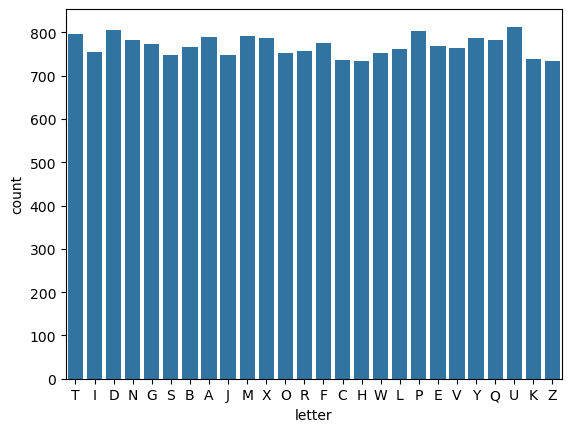

In [19]:
sns.countplot(x = y);

In [21]:
y.value_counts()

U    813
D    805
P    803
T    796
M    792
A    789
X    787
Y    786
N    783
Q    783
F    775
G    773
E    768
B    766
V    764
L    761
R    758
I    755
O    753
W    752
S    748
J    747
K    739
C    736
H    734
Z    734
Name: letter, dtype: int64

In [23]:
# cross validation

In [25]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, 
                                                   random_state= 42,
                                                   test_size= 0.20)

In [27]:
# build the model

In [29]:
from sklearn.svm import SVC

In [133]:
svc = SVC(kernel = 'sigmoid')

In [135]:
svc.fit(x_train, y_train)

SVC(kernel='sigmoid')

In [136]:
# evaluate

In [137]:
y_pred = svc.predict(x_test)

In [138]:
from sklearn.metrics import ConfusionMatrixDisplay, classification_report, accuracy_score

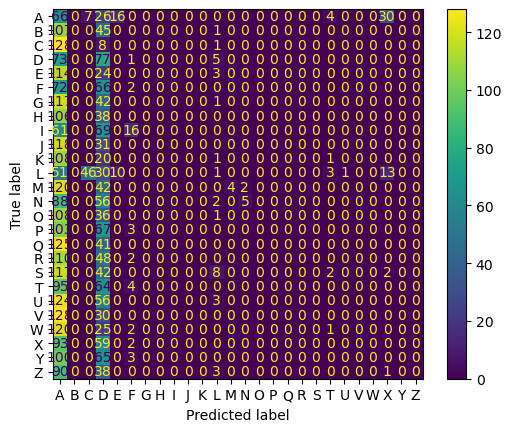

In [139]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred);

In [140]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           A       0.02      0.44      0.05       149
           B       0.00      0.00      0.00       153
           C       0.00      0.00      0.00       137
           D       0.07      0.49      0.12       156
           E       0.00      0.00      0.00       141
           F       0.06      0.01      0.02       140
           G       0.00      0.00      0.00       160
           H       0.00      0.00      0.00       144
           I       0.00      0.00      0.00       146
           J       0.00      0.00      0.00       149
           K       0.00      0.00      0.00       130
           L       0.03      0.01      0.01       155
           M       1.00      0.02      0.05       168
           N       0.71      0.03      0.06       151
           O       0.00      0.00      0.00       145
           P       0.00      0.00      0.00       173
           Q       0.00      0.00      0.00       166
           R       0.00    

C:\Program Files\Orange\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Program Files\Orange\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Program Files\Orange\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [141]:
accuracy_score(y_test, y_pred)

0.03875

In [142]:
# rbf = 0.9305
# poly = 0.95
# sigmoid = 0.03
# linear = 0.8545

In [143]:
# support vectors

In [144]:
svc.support_vectors_

array([[2., 2., 4., ..., 6., 2., 6.],
       [3., 6., 6., ..., 6., 3., 5.],
       [3., 7., 6., ..., 6., 4., 4.],
       ...,
       [2., 6., 3., ..., 8., 7., 8.],
       [4., 5., 5., ..., 8., 8., 8.],
       [3., 7., 5., ..., 8., 6., 4.]])

In [145]:
svc.support_vectors_.shape

(15958, 16)

In [146]:
# support vectors for each class

In [147]:
svc.n_support_

array([598, 613, 599, 649, 627, 635, 613, 590, 609, 598, 609, 606, 624,
       632, 608, 630, 617, 598, 577, 633, 630, 606, 604, 633, 618, 602])

In [161]:
y_pred_train = svc.predict(x_train)

In [163]:
accuracy_score(y_train, y_pred_train)

0.04275